# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Mahdi Aqil Ali
- **Email:** mahdiaqilz17@gmail.com
- **ID Dicoding:** aqilali

## Menentukan Pertanyaan Bisnis

1. Bagaimana pendapatan perminggu perusahaan hingga saat ini? (analisis ini dapat membantu perusahaan untuk mengevaluasi hasil pendapatan perusahaan seperti naik turunnya pendapatan sehingga bisa menjadi perhatian yang lebih utuk membantu perkembangan perusahaan selanjutnya)
2. Apa kategori produk yang memiliki tingkat penjualan tertinggi dan terendah? (analisis ini dapat membantu mengidentifikasi produk dengan performa penjualan terbaik dan yang membutuhkan perhatian lebih.)
3. Bagaimana hubungan antara metode pembayaran dan jumlah transaksi yang dilakukan? (pertanyaan ini membantu memahami metode pembayaran yang paling populer dan bagaimana metode tersebut mempengaruhi jumlah transaksi.)

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geodatasets
import streamlit as st

## Data Wrangling

### Gathering Data

Membaca semua data yang ada secara satu persatu

In [3]:

customers_df = pd.read_csv("data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
orders_df = pd.read_csv("data/orders_dataset.csv")
orders_df.head()     

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
order_payments_df = pd.read_csv("data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
order_reviews_df = pd.read_csv("data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
product_df = pd.read_csv("data/products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [9]:
product_categories_df = pd.read_csv("data/product_category_name_translation.csv")
product_categories_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
sellers_df = pd.read_csv("data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
geolocation_df = pd.read_csv("data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Insight:**
- Melihat struktur dataset dapat membantu kita untuk memahami data apa saja yang bisa kita gunakan untuk menjawab pertanyaan bisnis
- Pada data customers, order, dan product terdapat data-data yang bisa membantu kita untuk menjawab pertanyaan bisnis kita

### Assessing Data

Menilai tabel customers_df


In [12]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [14]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [15]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [16]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


menilai tabel orders_df


In [17]:
orders_df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [18]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


menilai tabel order_items_df

In [19]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [20]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [21]:
print("Jumlah duplikasi: ",order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


menilai tabel order_payments_df

In [22]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [23]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [24]:
print("Jumlah duplikasi: ",order_payments_df.duplicated().sum())
order_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


menilai order_reviews_df

In [25]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [26]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [27]:
print("Jumlah duplikasi: ",order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


menilai tabel product_df

In [28]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [29]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [30]:
print("Jumlah duplikasi: ",product_df.duplicated().sum())
product_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


menilai tabel product_categories_df

In [31]:
product_categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [32]:
product_categories_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [33]:
print("Jumlah duplikasi: ",product_categories_df.duplicated().sum())
product_categories_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Menilai tabel geolocation_df

In [34]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [35]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [36]:
print("Jumlah duplikasi: ",geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**Insight:**
- Terdapat beberapa kolom yang memiliki value null, sehingga harus kita bersihkan pada tahap cleaning agar data bisa digunakan
- Terdapat beberapa kolom pada tabel orders_dataset yang memiliki tipe data yang salah, sehingga harus kita ganti tipe datanya agar dapat kita analisis
- Terdapat beberapa tabel yang memiliki nilai duplikat yang bisa kita hapus untuk menambah efisiensi dan akurasi analisis data kita

### Cleaning Data

**Memperbaiki Tipe Data**

berdasarkan proses assessing data kita ketahui bahawa kolom order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date terdapat kesalahan tipe data dimana tipe data nya adalah object. untuk mengatasi masalah tersebut, kita akan mengganti tipe datanya menjadi datetime().

In [37]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [38]:
datetime_columns = ["order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [39]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  object        
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(4)
memory usage: 6.1+ MB


In [40]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [41]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Berdasarkan assessing data, terlihat banyak data yang bernilai NaN, sehingga kita harus merubah value dari kolom dengan nilai NaN itu

In [42]:
product_df["product_weight_g"].fillna(product_df["product_weight_g"].mean(), inplace=True)
product_df["product_length_cm"].fillna(product_df["product_length_cm"].mean(), inplace=True)
product_df["product_height_cm"].fillna(product_df["product_height_cm"].mean(), inplace=True)
product_df["product_width_cm"].fillna(product_df["product_width_cm"].mean(), inplace=True)

C:\Users\mahdi\AppData\Local\Temp\ipykernel_1412\2902906771.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  product_df["product_weight_g"].fillna(product_df["product_weight_g"].mean(), inplace=True)
C:\Users\mahdi\AppData\Local\Temp\ipykernel_1412\2902906771.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [43]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

In [44]:
order_payments_df = order_payments_df.drop(order_payments_df[order_payments_df["payment_type"] == "not_defined"].index)

In [45]:
geolocation_df.duplicated().sum()

np.int64(261831)

Dikarenakan banyaknya nilai duplikat yang ada pada tabel geolocation_df, kita bisa hapus value yang duplikat tersebut

In [46]:
geolocation_df.drop_duplicates(subset='geolocation_zip_code_prefix', inplace=True)

In [47]:
geolocation_df.duplicated().sum()

np.int64(0)

**Insight:**
- order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date sudah kita ubah tipe datanya menjadi datetime sehingga dapat kita gunakan sebagai analisis yang melibatkan tentang waktu
- Missing value di beberapa kolom sudah kita dengan nilai mean dari kolom tersebut, sehingga data lebih mudah dianaisis 

## Exploratory Data Analysis (EDA)

Sebelum explore data untuk kebutuhan analisis berdasarkan pertanyaan bisnis kita, kita gabungkan terlebih dahulu setiap data yang tersedia menjadi satu tabel

In [48]:
merged_df = pd.merge(
  left=customers_df,
  right=orders_df,
  how="left",
  on="customer_id"
)
merged_df.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [88]:
merged2_df = pd.merge(
  left=merged_df,
  right=order_payments_df,
  how="left",
  on="order_id"
)
merged2_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,252.25


In [89]:
merged3_df = pd.merge(
  left=merged2_df,
  right=order_items_df,
  how="left",
  on="order_id"
)
merged3_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [90]:
merged4_df = pd.merge(
  left=merged3_df,
  right=product_df,
  how="left",
  on="product_id"
)
merged4_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,230.00,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0


In [91]:
merged5_df = pd.merge(
  left=merged4_df,
  right=geolocation_df,
  how="left",
  left_on="customer_zip_code_prefix",
  right_on="geolocation_zip_code_prefix"
)
merged5_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,8683.0,54.0,64.0,31.0,14409.0,-20.509897,-47.397866,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,3.0,10150.0,89.0,15.0,40.0,9790.0,-23.726853,-46.545746,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,8267.0,52.0,52.0,17.0,1151.0,-23.527788,-46.660310,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,12160.0,56.0,51.0,28.0,8775.0,-23.496930,-46.185352,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,5200.0,45.0,15.0,35.0,13056.0,-22.987222,-47.151073,campinas,SP


Menyimpan hasil merge semua tabel di variabel main_data

In [109]:
main_data = merged5_df
main_data.to_csv("main_data.csv")
main_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
order_purchase_timestamp,,,,,,,,,,,,,,,,,,,,,
2017-05-16 15:05:35,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,...,1.0,8683.0,54.0,64.0,31.0,14409.0,-20.509897,-47.397866,franca,SP
2018-01-12 20:48:24,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,...,3.0,10150.0,89.0,15.0,40.0,9790.0,-23.726853,-46.545746,sao bernardo do campo,SP
2018-05-19 16:07:45,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,...,1.0,8267.0,52.0,52.0,17.0,1151.0,-23.527788,-46.660310,sao paulo,SP
2018-03-13 16:06:38,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,...,1.0,12160.0,56.0,51.0,28.0,8775.0,-23.496930,-46.185352,mogi das cruzes,SP
2018-07-29 09:51:30,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,...,1.0,5200.0,45.0,15.0,35.0,13056.0,-22.987222,-47.151073,campinas,SP


In [93]:
print("Rincian Dataset E-Commerce Public Dataset\n")

datasets = {
  "main_data" : main_data
}

for name, df in datasets.items():
  print("Kolom {} :".format(name), df.columns, "\n"
        "Jumlah Kolom : {}\n".format(len(df.columns)),
        "Jumlah Baris : {}\n".format(len(df)))

Rincian Dataset E-Commerce Public Dataset

Kolom main_data : Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object') 
Jumlah Kolom : 35
 Jumlah Baris : 118434



### Explore main_data


In [99]:
main_data.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
12265,47d3027e3dce97a4102da39a523554a1,0b35b0c15e108cf218f935d9bb2069a4,2408,sao paulo,SP,9e0c7da69212a91ad90bc37ab91a6c68,delivered,2018-03-03 09:39:22,2018-03-03 09:50:27,2018-03-05 19:04:26,...,1.0,533.0,22.0,11.0,20.0,2408.0,-23.481927,-46.626465,sao paulo,SP
16520,11e55f8da60d95653cfe027e0e90c51a,9084ddf25334d2b3afaf25994ce72e98,9930,diadema,SP,338084a6f213912faa2ab6b87c6d388f,delivered,2018-04-09 16:30:11,2018-04-10 04:10:12,2018-04-10 21:43:42,...,2.0,400.0,18.0,11.0,20.0,9930.0,-23.661249,-46.616841,diadema,SP
106369,13ee665987aa0e4a0774873d690d1ff3,fb26fc589f9abe8c36172fa387beb145,9750,sao bernardo do campo,SP,62cf6dda02445af325376ddf00bbcfdb,delivered,2017-11-18 19:08:27,2017-11-18 19:26:04,2017-11-28 17:59:48,...,2.0,855.0,36.0,23.0,28.0,9750.0,-23.688917,-46.552552,sao bernardo do campo,SP
45711,638450a5fcf36c86e90ca1c5b7ebd357,1d5776ff17aff5591c5653c463cdc438,35450,itabirito,MG,6b353bba58520d286313c6f64cc078ff,delivered,2017-11-30 19:12:57,2017-12-01 09:31:02,2017-12-01 17:22:14,...,1.0,16500.0,38.0,65.0,45.0,35450.0,-20.257796,-43.811840,itabirito,MG
32669,b002b854dca9856120dc7f6e22d9313d,9a6fcde7014269861d6fa57d4719900b,7151,guarulhos,SP,0e94db37ea63222e95092a0f870f8e9a,delivered,2018-01-28 19:57:02,2018-01-28 20:11:06,2018-02-01 01:17:49,...,2.0,1750.0,37.0,22.0,40.0,7151.0,-23.407682,-46.455214,guarulhos,SP


In [100]:
main_data.describe(include = "all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,118434,118434,118434.000000,118434,118434,118434,118434,118434,118258,116360,...,115906.000000,117604.00000,117604.000000,117604.000000,117604.000000,118117.000000,118117.000000,118117.000000,118117,118117
unique,99441,96096,NaN,4119,27,99441,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4200,27
top,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sao paulo,SP
freq,63,75,NaN,18738,49967,63,115038,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15962,49950
mean,NaN,NaN,35034.264392,NaN,NaN,NaN,NaN,2017-12-30 04:00:24.559636224,2017-12-30 14:12:31.341397248,2018-01-03 17:52:23.945324544,...,2.207849,2114.30865,30.256967,16.630342,23.068415,34957.002311,-21.229119,-46.191452,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,...,1.000000,0.00000,7.000000,2.000000,6.000000,1003.000000,-36.605374,-72.666706,NaN,NaN
25%,NaN,NaN,11310.000000,NaN,NaN,NaN,NaN,2017-09-11 12:53:55.249999872,2017-09-11 22:45:23,2017-09-14 22:50:53.500000,...,1.000000,300.00000,18.000000,8.000000,15.000000,11095.000000,-23.589020,-48.090501,NaN,NaN
50%,NaN,NaN,24240.000000,NaN,NaN,NaN,NaN,2018-01-17 17:57:56.500000,2018-01-18 02:11:35,2018-01-23 20:43:19,...,1.000000,700.00000,25.000000,13.000000,20.000000,24230.000000,-22.929319,-46.631802,NaN,NaN
75%,NaN,NaN,58464.500000,NaN,NaN,NaN,NaN,2018-05-03 19:05:01,2018-05-04 02:51:40.249999872,2018-05-07 16:31:45,...,3.000000,1800.00000,38.000000,20.000000,30.000000,58187.000000,-20.193636,-43.613084,NaN,NaN
max,NaN,NaN,99990.000000,NaN,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,...,20.000000,40425.00000,105.000000,105.000000,118.000000,99990.000000,42.184003,-8.577855,NaN,NaN


Mencari banyaknya customer dan kota dari setiap provinsi

In [101]:
customer_distribution = main_data.groupby(by="customer_state").agg({
  "customer_city" : "nunique",
  "customer_id" : "nunique"
})
customer_distribution = customer_distribution.sort_values(by="customer_id", ascending=False)
customer_distribution 

,customer_city,customer_id
customer_state,,
SP,629,41746
RJ,149,12852
MG,745,11635
RS,379,5466
PR,364,5045
SC,240,3637
BA,353,3380
DF,6,2140
ES,95,2033


Mencari banyaknya nilai penjualan yang dihasilkan di setiap metode pembayaran

In [102]:
paymentType_to_paymentValue = main_data.groupby("payment_type")["payment_value"].sum().reset_index()
paymentType_to_paymentValue = paymentType_to_paymentValue.sort_values(by="payment_value", ascending=False)
paymentType_to_paymentValue

,payment_type,payment_value
1,credit_card,15694885.84
0,boleto,4086820.71
3,voucher,432602.19
2,debit_card,256417.92


Mencari nilai penjualan pada setiap kategori produk sebagai perbandingan produk yang mendapatkan keuntungan terbanyak

In [103]:
product_revenue = main_data.groupby(by="product_category_name").agg({
  "payment_value" : "sum",
})
product_revenue = product_revenue.sort_values(by="payment_value", ascending=False)
product_revenue

,payment_value
product_category_name,
cama_mesa_banho,1712553.67
beleza_saude,1657373.12
informatica_acessorios,1585330.45
moveis_decoracao,1430176.39
relogios_presentes,1429216.68
...,...
pc_gamer,2174.43
casa_conforto_2,1710.54
cds_dvds_musicais,1199.43


Mencari jumlah pengeluaran pelanggan dari setiap state(provinsi)

In [104]:
state_to_payment = main_data.groupby(by="customer_state").agg({
  "payment_value" : "sum"
})

state_to_payment = state_to_payment.sort_values(by="payment_value", ascending=False)
state_to_payment

,payment_value
customer_state,
SP,7673188.55
RJ,2783724.26
MG,2341861.47
RS,1152019.17
PR,1074614.19
BA,802416.72
SC,799135.92
GO,516182.51
DF,434512.55


Mencari keuntungan perusahaan setiap minggu

In [105]:
main_data["order_purchase_timestamp"] = pd.to_datetime(main_data["order_purchase_timestamp"])
main_data.set_index('order_purchase_timestamp', inplace=True)
weekly_revenue = main_data.resample('W')['payment_value'].sum().reset_index(name='weekly_total_revenue')
weekly_revenue

,order_purchase_timestamp,weekly_total_revenue
0,2016-09-04,272.46
1,2016-09-11,75.06
2,2016-09-18,40.95
3,2016-09-25,0.00
4,2016-10-02,109.34
...,...,...
107,2018-09-23,276.04
108,2018-09-30,453.20
109,2018-10-07,277.93
110,2018-10-14,0.00


**Insight:**
- Dari hasil analisis tersebut, kita dapat melihat berapa jumlah revenue per minggu. Hal ini bisa membantu perusahaan untuk memutuskan strategi atau keputusan setelahnya
- Dari hasil evaluasi, kita dapat melihat kategori produk mana saja yang memiliki tingkat penjualan yang lebih tingi, sehingga perusahaan bisa menambah sumber daya pada kategori produk tersebut
- Dari hasil analisis, kita dapat hubungan antara metode pembayaran dengan jumlah transaksi yang dilakukan, sehingga dapat membantu perusahaan dalam memahami metode pembayaran apa yang paling populer dan bagaimana metode tersebut mempengaruhi jumlah transaksi

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pendapatan perminggu perusahaan hingga saat ini? (analisis ini dapat membantu perusahaan untuk mengevaluasi hasil pendapatan perusahaan seperti naik turunnya pendapatan sehingga bisa menjadi perhatian yang lebih utuk membantu perkembangan perusahaan selanjutnya)

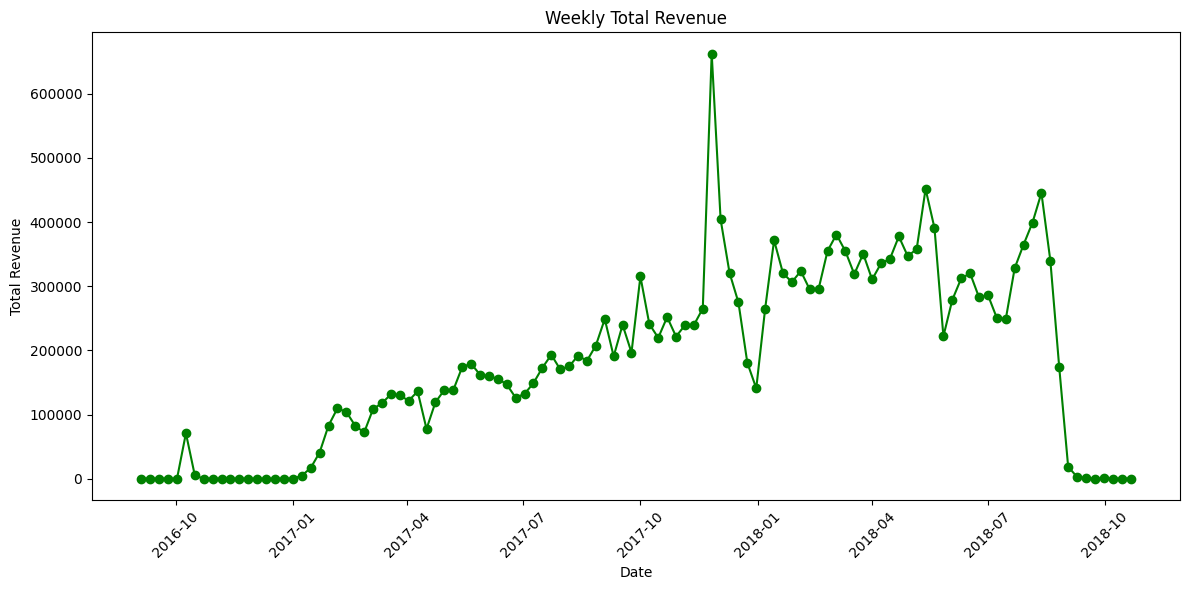

In [106]:
plt.figure(figsize=(12,6))
plt.plot(weekly_revenue['order_purchase_timestamp'], weekly_revenue['weekly_total_revenue'], marker='o', color='green')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.title('Weekly Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Pertanyaan 2: Apa kategori produk yang memiliki tingkat penjualan tertinggi dan terendah? (analisis ini dapat membantu mengidentifikasi produk dengan performa penjualan terbaik dan yang membutuhkan perhatian lebih.)

C:\Users\mahdi\AppData\Local\Temp\ipykernel_1412\3001693630.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="payment_value", y="product_category_name", data=product_revenue.head(5), palette=colors, ax=ax[0])
C:\Users\mahdi\AppData\Local\Temp\ipykernel_1412\3001693630.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="payment_value", y="product_category_name", data=product_revenue_worst.head(5), palette=colors, ax=ax[1])


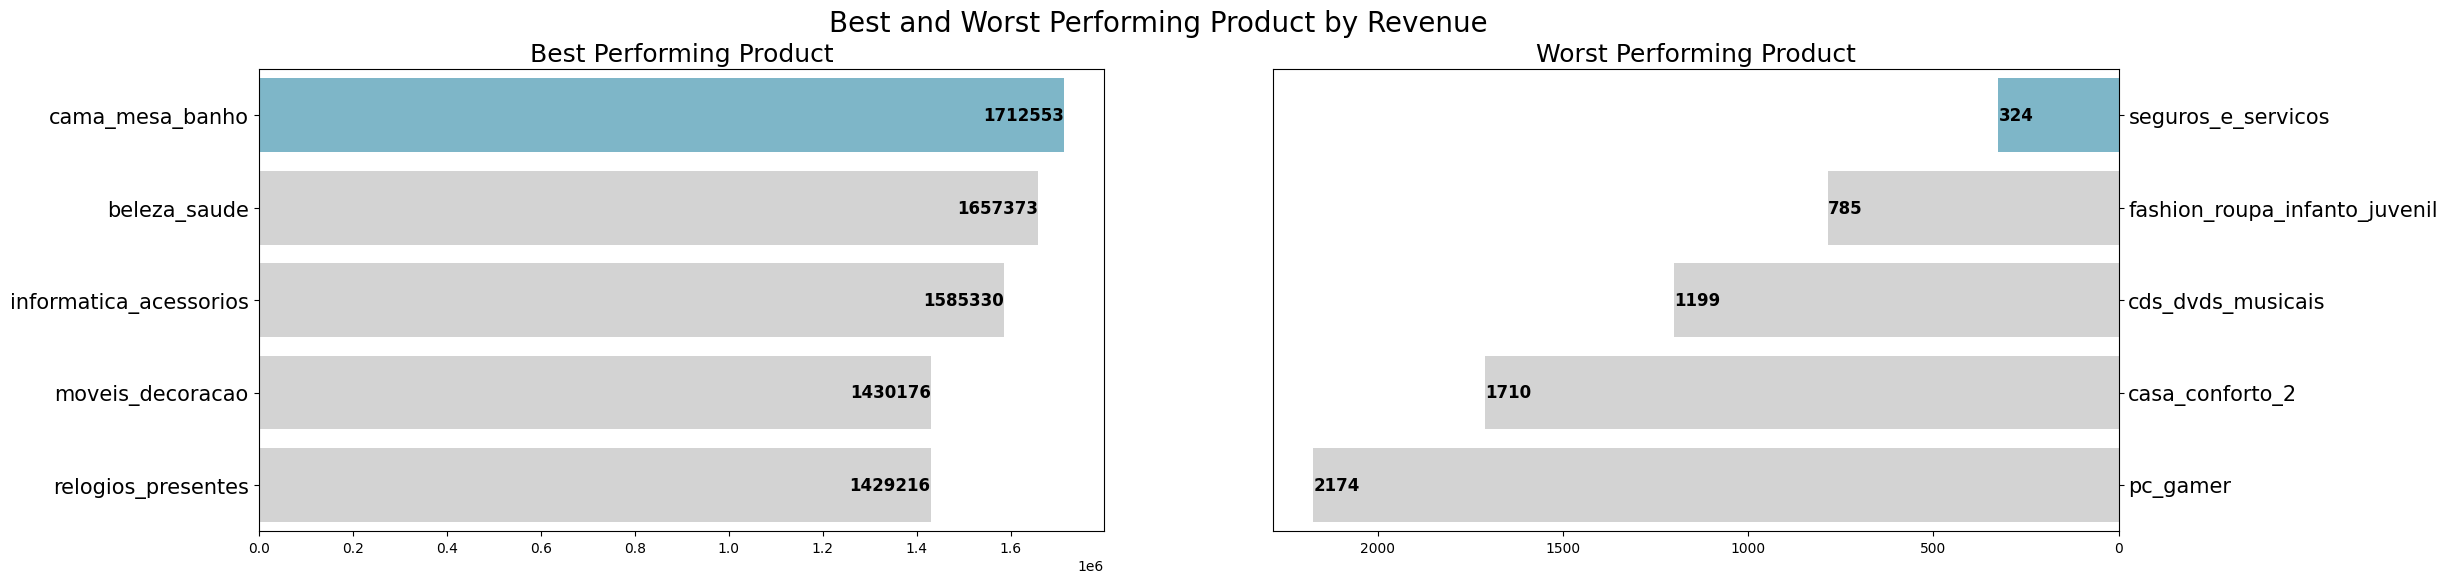

In [107]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="payment_value", y="product_category_name", data=product_revenue.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)  
for i in ax[0].patches:
    ax[0].text(i.get_width() + 0.2, i.get_y() + i.get_height()/2, 
               f'{int(i.get_width())}', ha='right', va='center', fontsize=12, color='black', weight='bold')

product_revenue_worst = product_revenue.sort_values(by="payment_value", ascending=True)

sns.barplot(x="payment_value", y="product_category_name", data=product_revenue_worst.head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)
for i in ax[1].patches:
    ax[1].text(i.get_width() - 0.2, i.get_y() + i.get_height()/2, 
               f'{int(i.get_width())}', ha='left', va='center', fontsize=12, color='black', weight='bold')

plt.suptitle("Best and Worst Performing Product by Revenue", fontsize=20)
plt.show()

### Pertanyaan 3: Bagaimana hubungan antara metode pembayaran dan jumlah transaksi yang dilakukan? (pertanyaan ini membantu memahami metode pembayaran yang paling populer dan bagaimana metode tersebut mempengaruhi jumlah transaksi.)

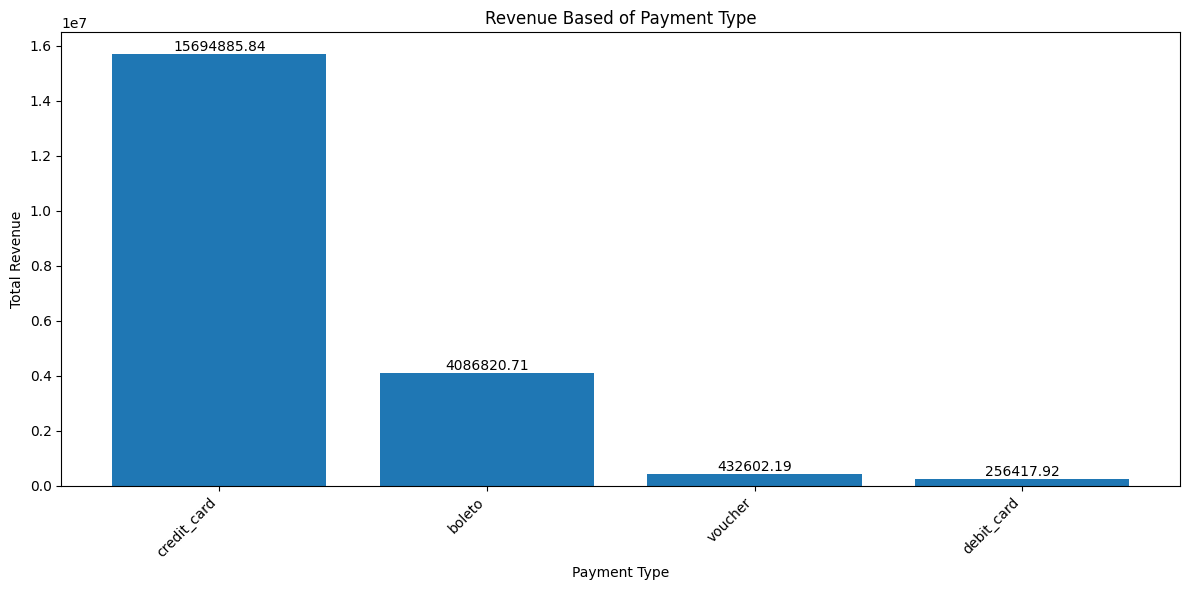

In [108]:
plt.figure(figsize=(12, 6))
bars = plt.bar(paymentType_to_paymentValue["payment_type"], paymentType_to_paymentValue["payment_value"])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Payment Type')
plt.ylabel('Total Revenue')
plt.title('Revenue Based of Payment Type')
plt.tight_layout()
plt.show()

**Insight:**
- Pada rentang bulan Oktober 2017 sampai dengan Januari 2018 terdapat peningkatan pendapatan yang pesat, tetapi setelah itu pendapatan mengalami penurunan secara perlahan, sehingga bisa menjadi evaluasi perusahaan untuk memikirkan strategi untuk meningkatkan pendapatan pada masa mendatang
- Kategori produk dengan pendapatan tertinggi dapat menjadi data yang penting bagi perusahaan untuk memahami permintaan pasar, sehingga sumber daya perusahaan bisa ditujukan kepada kategori produk unggulan tersebut
- hubungan antara metode pembayaran dengan revenue dapat dilihat bahwa pelanggan yang menggunakan metode pembayaran credit card mengeluarkan uang lebih banyak dibandingkan metode pembayaran yang lain

In [73]:
main_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    118434 non-null  object        
 1   customer_unique_id             118434 non-null  object        
 2   customer_zip_code_prefix       118434 non-null  int64         
 3   customer_city                  118434 non-null  object        
 4   customer_state                 118434 non-null  object        
 5   order_id                       118434 non-null  object        
 6   order_status                   118434 non-null  object        
 7   order_purchase_timestamp       118434 non-null  datetime64[ns]
 8   order_approved_at              118258 non-null  datetime64[ns]
 9   order_delivered_carrier_date   116360 non-null  datetime64[ns]
 10  order_delivered_customer_date  115037 non-null  datetime64[ns]
 11  

## Analisis Lanjutan (Opsional)

### Analisis RFM

Recency : Menghitung jumlah hari sejak terakhir kali pelanggan melakukan pembelian (order_purchase_timestamp)


Frequency : Menghitung jumlah total transaksi yang dilakukan oleh pelanggan dalam periode tertentu (order_id)


Monetary : Menghitung total pengeluaran pelanggan dalam periode tersebut (price).

In [74]:
rfm_df = main_data.groupby(by="customer_id", as_index=False).agg({
        "order_purchase_timestamp": "max",
        "order_id": "nunique",
        "payment_value": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,107.01


In [75]:
rfm_df["max_order_timestamp"] = pd.to_datetime(rfm_df["max_order_timestamp"])
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = main_data["order_purchase_timestamp"].dropna().dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(
    lambda x: (recent_date - x).days if pd.notnull(x) else None
)
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,114.74,337
1,000161a058600d5901f007fab4c27140,2017-07-16,1,67.41,458
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,195.42,596
3,0002414f95344307404f0ace7a26f1d5,2017-08-16,1,179.35,427
4,000379cdec625522490c315e70c7a9fb,2018-04-02,1,107.01,198


In [76]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,337
1,000161a058600d5901f007fab4c27140,1,67.41,458
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,596
3,0002414f95344307404f0ace7a26f1d5,1,179.35,427
4,000379cdec625522490c315e70c7a9fb,1,107.01,198


In [77]:
rfm_df.describe(include="all")

,customer_id,frequency,monetary,recency
count,99441,99441.0,99441.000000,99441.000000
unique,99441,NaN,NaN,NaN
top,ffffe8b65bbe3087b653a978c870db99,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,1.0,205.858013,290.272956
std,NaN,0.0,619.118686,153.670615
min,NaN,1.0,0.000000,0.000000
25%,NaN,1.0,62.760000,166.000000
50%,NaN,1.0,109.620000,272.000000
75%,NaN,1.0,195.910000,400.000000


In [78]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
63970,a4b417188addbc05b26b72d5e44837a1,1,89.71,0
51713,856336203359aa6a61bf3826f7d84c49,1,222.03,1
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,1,197.55,14
74611,bf6181a85bbb4115736c0a8db1a53be3,1,80.38,16
15595,2823ffda607a2316375088e0d00005ec,1,137.03,18


In [79]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
99440,ffffe8b65bbe3087b653a978c870db99,1,18.37,383
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,337
1,000161a058600d5901f007fab4c27140,1,67.41,458
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,596
3,0002414f95344307404f0ace7a26f1d5,1,179.35,427


C:\Users\mahdi\AppData\Local\Temp\ipykernel_1412\3889611089.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="sorted_customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\mahdi\AppData\Local\Temp\ipykernel_1412\3889611089.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="sorted_customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\mahdi\AppData\Local\Temp\ipykernel_1412\3889611089.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `le

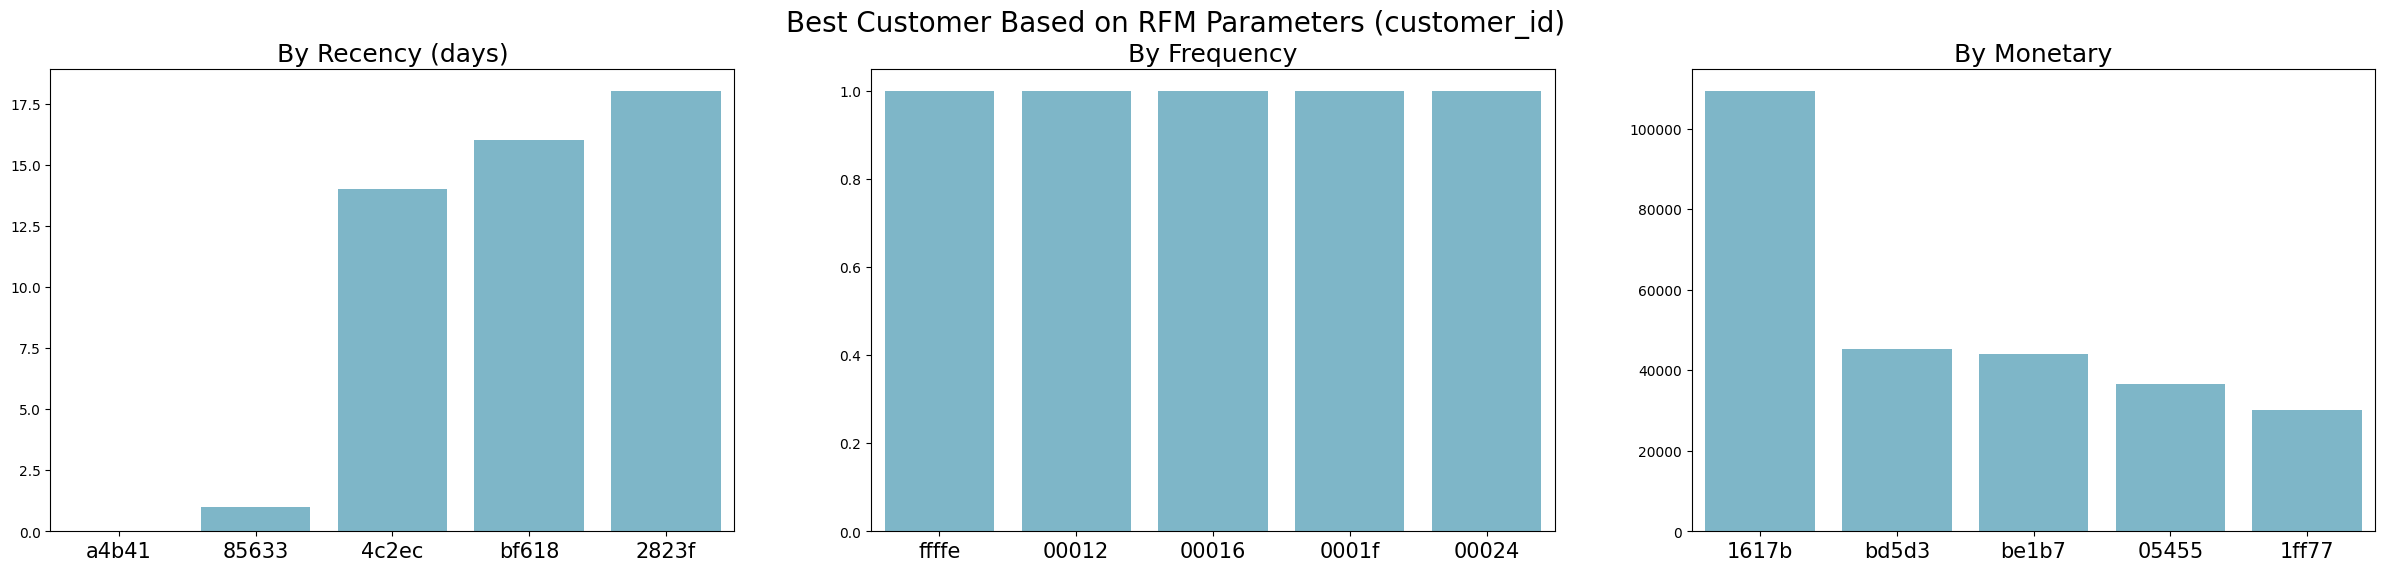

In [80]:
rfm_df["sorted_customer_id"] = rfm_df["customer_id"].apply(lambda x: x[:5])
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="sorted_customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ="x", labelsize=15)

sns.barplot(y="frequency", x="sorted_customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis="x", labelsize=15)

sns.barplot(y="monetary", x="sorted_customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis="x", labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

In [81]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,sorted_customer_id,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,337,00012,34364.5,49721.0,51739.0
1,000161a058600d5901f007fab4c27140,1,67.41,458,00016,16871.5,49721.0,28180.0
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,596,0001f,2882.0,49721.0,74481.5
3,0002414f95344307404f0ace7a26f1d5,1,179.35,427,00024,21181.5,49721.0,71465.0
4,000379cdec625522490c315e70c7a9fb,1,107.01,198,00037,66986.5,49721.0,48658.5


In [82]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100
 
rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)
 
rfm_df.head()

,customer_id,frequency,monetary,recency,sorted_customer_id,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,337,00012,34.557677,100.0,52.029847
1,000161a058600d5901f007fab4c27140,1,67.41,458,00016,16.966342,100.0,28.338412
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,596,0001f,2.898201,100.0,74.900192
3,0002414f95344307404f0ace7a26f1d5,1,179.35,427,00024,21.300570,100.0,71.866735
4,000379cdec625522490c315e70c7a9fb,1,107.01,198,00037,67.363060,100.0,48.932030


In [83]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,3.14
1,000161a058600d5901f007fab4c27140,2.33
2,0001fd6190edaaf884bcaf3d49edf079,3.56
3,0002414f95344307404f0ace7a26f1d5,3.61
4,000379cdec625522490c315e70c7a9fb,3.30
5,0004164d20a9e969af783496f3408652,2.34
6,000419c5494106c306a97b5635748086,2.32


In [84]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,3.14,Medium value customer
1,000161a058600d5901f007fab4c27140,2.33,Low value customers
2,0001fd6190edaaf884bcaf3d49edf079,3.56,Medium value customer
3,0002414f95344307404f0ace7a26f1d5,3.61,Medium value customer
4,000379cdec625522490c315e70c7a9fb,3.30,Medium value customer
5,0004164d20a9e969af783496f3408652,2.34,Low value customers
6,000419c5494106c306a97b5635748086,2.32,Low value customers
7,00046a560d407e99b969756e0b10f282,3.69,Medium value customer
8,00050bf6e01e69d5c0fd612f1bcfb69c,2.69,Low value customers
9,000598caf2ef4117407665ac33275130,4.93,Top customers


In [85]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,16130
1,Low value customers,41890
2,Medium value customer,34694
3,Top customers,5653
4,lost customers,1074


In [86]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

C:\Users\mahdi\AppData\Local\Temp\ipykernel_1412\1016365800.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


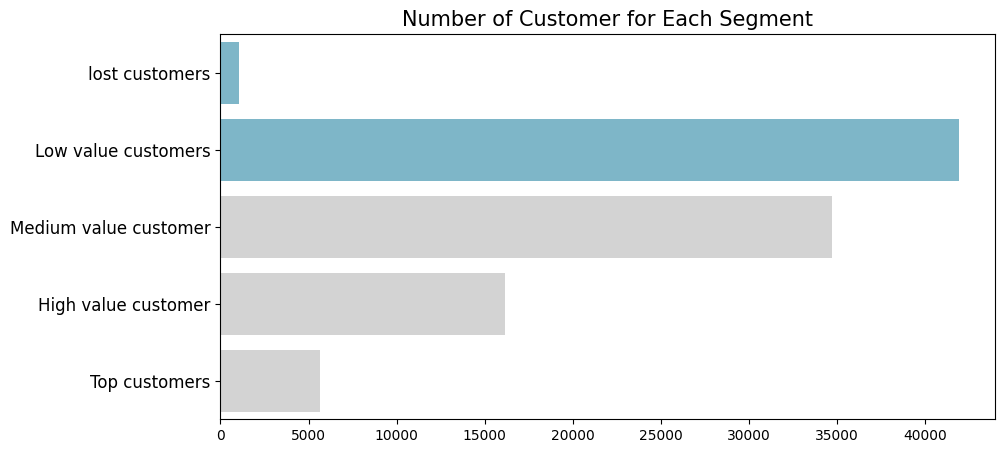

In [87]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id", 
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

- **Weekly Revenue :** Dari analisis tren pendapatan antara Oktober 2017 hingga Januari 2018, terlihat adanya peningkatan pendapatan yang signifikan. Namun, setelah periode tersebut, pendapatan mengalami penurunan secara bertahap. Pola ini menunjukkan bahwa meskipun perusahaan mengalami pertumbuhan yang kuat di akhir 2017, momentum tersebut tidak berlanjut pada bulan-bulan berikutnya. Untuk mengatasi hal ini, perusahaan perlu mengevaluasi faktor-faktor yang berkontribusi terhadap peningkatan pendapatan selama periode pertumbuhan, seperti efek musiman, kampanye pemasaran, promosi, atau peluncuran produk baru.


- **Best and Worst Product :** Dari analisis produk dapat disimpulkan bahwa perusahaan perlu fokus pada strategi untuk terus mendukung dan mempromosikan produk-produk terbaik, sekaligus mengevaluasi dan memperbaiki aspek-aspek dari produk yang kurang berhasil. Hal ini dapat mencakup perubahan pada desain, harga, atau bahkan strategi pemasaran untuk meningkatkan performa produk-produk yang berada di kategori terburuk.

- **Payment Methods and Revenue :** Dari analisis hubungan antara metode pembayaran dan pendapatan, ditemukan bahwa metode kartu kredit menghasilkan pendapatan tertinggi dibandingkan metode pembayaran lainnya. Hal ini menunjukkan preferensi pelanggan dalam menggunakan kartu kredit untuk transaksi dengan nilai yang lebih tinggi atau lebih sering. Perusahaan dapat mempertimbangkan untuk meningkatkan kemudahan penggunaan kartu kredit melalui promosi khusus atau program loyalitas. Selain itu, evaluasi terhadap metode pembayaran lain yang berkontribusi lebih rendah perlu dilakukan untuk mengidentifikasi dan mengatasi kendala yang mungkin dihadapi pelanggan dalam penggunaannya, sehingga bisa mengoptimalkan pilihan pembayaran yang ada.